  ### Credit Card Fraud Detection - Govind Konnanat

#### In this notebook, exploration of the data through initial EDA with some visualizations.The main goal which is to explore ways to handle imbalanced data.

Logistic Regression is used in this project in-order to fine tune the Precision/Recall Curve using the confusion matrix

#### Importing the modules & dataset

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200
import numpy as np

import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve

import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/govin/OneDrive/Documents/Projects/Foxmula Data/Credit-card-dataset/creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.23959

The data has a column called 'Time', which are seconds from which the very first data observation took place, so converting into hours of the day

In [4]:
df['hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

In [5]:
df.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


As we can see, the amount of transaction are the  the least from 1AM to 5AM

## Visualizing the Data

In [6]:
def PlotHistogram(df,norm):
    bins = np.arange(df['hour'].min(),df['hour'].max()+2)
    plt.figure(figsize=(15,4))
    sns.distplot(df[df['Class']==0.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='b',
                 hist_kws={'alpha':.5},
                 label='Legit')
    sns.distplot(df[df['Class']==1.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='r',
                 label='Fraud',
                 hist_kws={'alpha':.5})
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()

Normalized histogram of Legit/Fraud over hour of the day


C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


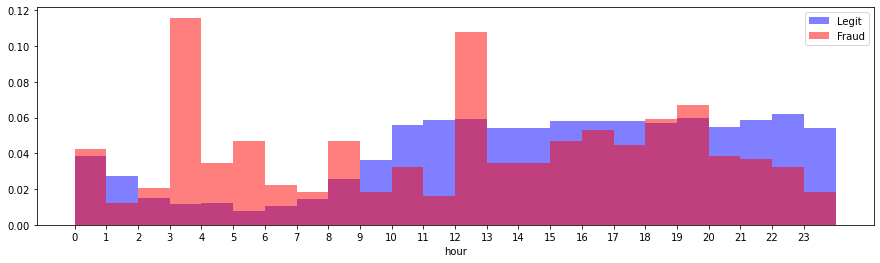

Un-Normalized Counts histogram of Legit/Fraud over hour of the day


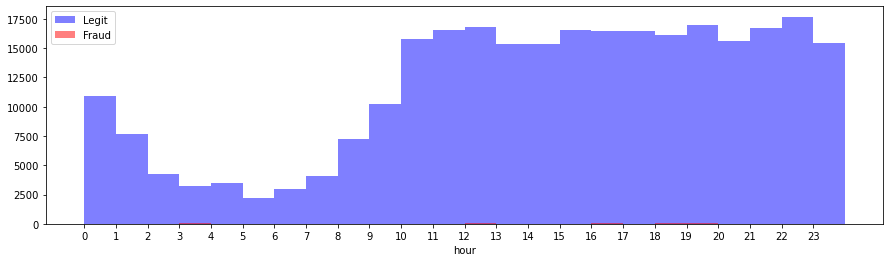

0.5936133861541748


In [7]:
start = time.time()
print('Normalized histogram of Legit/Fraud over hour of the day')
PlotHistogram(df,True)
print('Un-Normalized Counts histogram of Legit/Fraud over hour of the day')
PlotHistogram(df,False)
print(time.time()-start)

In [8]:
print('Fraud is {}% of our data.'.format(df['Class'].value_counts()[1] / float(df['Class'].value_counts()[0])*100))

Fraud is 0.17304750013189596% of our data.


In [9]:
mask_true = (df['Class'] == 1.0) 
mask_false = (df['Class'] == 0.0)

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0,0.0


## Model Building

In [11]:
features = pd.concat([df.loc[:,'V1':'Amount'],df.loc[:,'Time']],axis=1)
target = df['Class']

x_train,x_test,y_train,y_test = train_test_split(features,target, stratify=target,test_size=0.35, random_state=1)

print('y_train class counts')
print(y_train.value_counts())
print('')
print('y_test class counts')
print(y_test.value_counts())


# storing y_test legit and fraud counts for normalization purposes later on
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

y_train class counts
0    184804
1       320
Name: Class, dtype: int64

y_test class counts
0    99511
1      172
Name: Class, dtype: int64


In [12]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

pred = lr_model.predict(x_test)

C:\Users\govin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


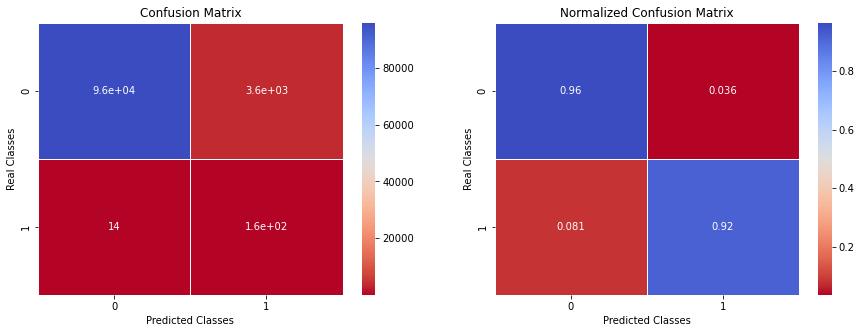

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     99511
           1       0.04      0.92      0.08       172

    accuracy                           0.96     99683
   macro avg       0.52      0.94      0.53     99683
weighted avg       1.00      0.96      0.98     99683



In [33]:
def PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud):

    cfn_matrix = confusion_matrix(y_test,pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('                       ---Classification Report---')
    print(classification_report(y_test,pred))

PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud)

## Addressing the Class Imbalance

Sci-Kit Learn classifiers can give heavier weights to the minority class using a simple parameter during model initiation



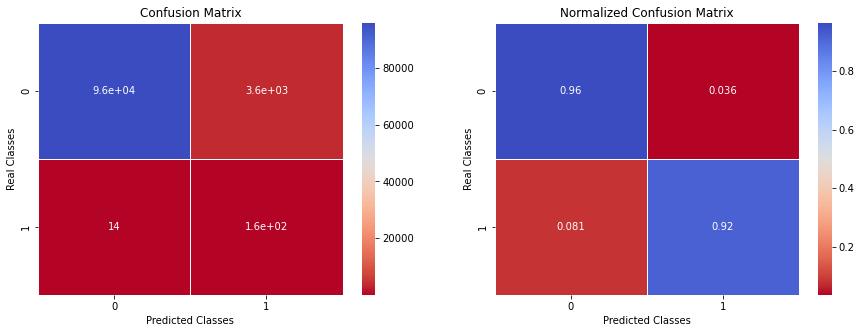

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     99511
           1       0.04      0.92      0.08       172

    accuracy                           0.96     99683
   macro avg       0.52      0.94      0.53     99683
weighted avg       1.00      0.96      0.98     99683



In [34]:
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(x_train,y_train)

pred = lr_model.predict(x_test)

PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud)

 We have a 96% True Negative rate and a 92% True Positive rate

However, if we look at the individual precision scores, this classifer is now a lot less precise than before. This is because we have increased our Fraud recall score at the expense of more mis-classified Legit cases. With the "balanced" weight parameter, we have increased our false positive counts from 39 to 2300. 

In [36]:
#Specify our own weights. The weights are somewhat arbitrary but it illustrates the tradeoff between precision and recall.

---Weight of 1 for Fraud class---


C:\Users\govin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


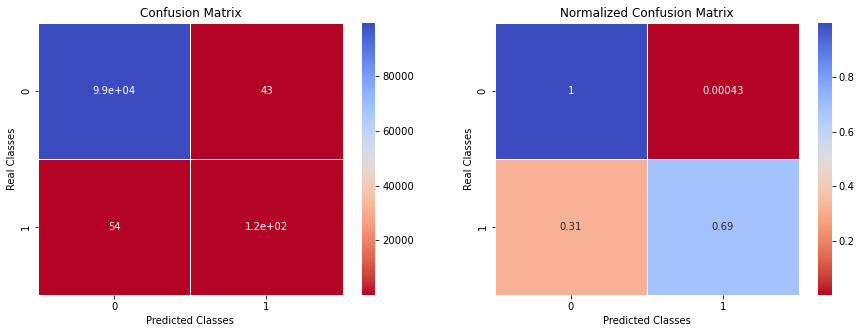

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99511
           1       0.73      0.69      0.71       172

    accuracy                           1.00     99683
   macro avg       0.87      0.84      0.85     99683
weighted avg       1.00      1.00      1.00     99683

---Weight of 5 for Fraud class---


C:\Users\govin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


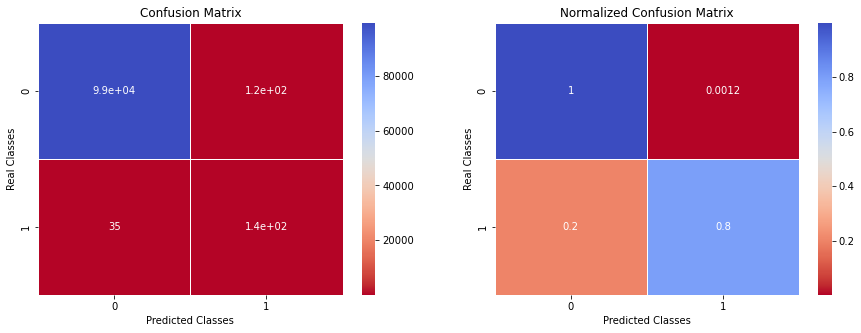

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99511
           1       0.54      0.80      0.64       172

    accuracy                           1.00     99683
   macro avg       0.77      0.90      0.82     99683
weighted avg       1.00      1.00      1.00     99683

---Weight of 10 for Fraud class---


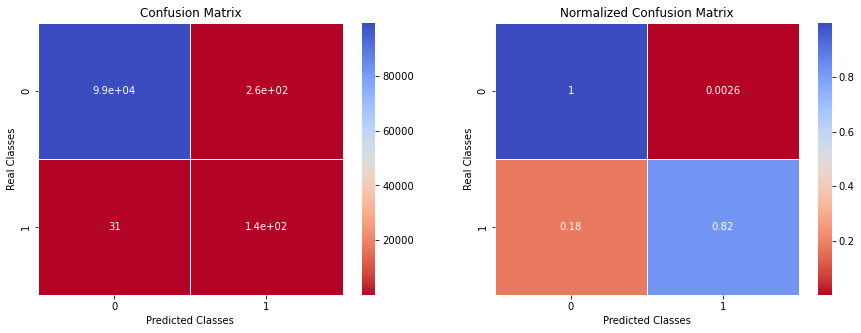

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99511
           1       0.36      0.82      0.50       172

    accuracy                           1.00     99683
   macro avg       0.68      0.91      0.75     99683
weighted avg       1.00      1.00      1.00     99683

---Weight of 100 for Fraud class---


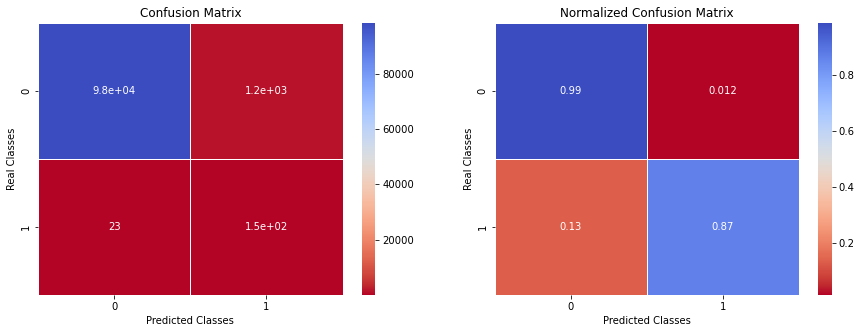

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99511
           1       0.11      0.87      0.19       172

    accuracy                           0.99     99683
   macro avg       0.55      0.93      0.59     99683
weighted avg       1.00      0.99      0.99     99683

---Weight of 500 for Fraud class---


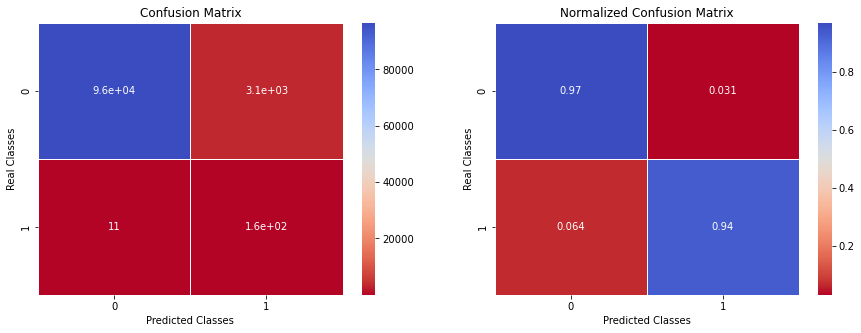

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     99511
           1       0.05      0.94      0.10       172

    accuracy                           0.97     99683
   macro avg       0.52      0.95      0.54     99683
weighted avg       1.00      0.97      0.98     99683

---Weight of 1000 for Fraud class---


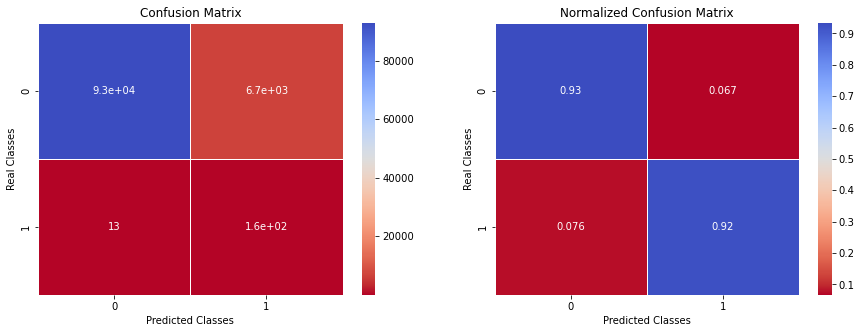

                       ---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     99511
           1       0.02      0.92      0.05       172

    accuracy                           0.93     99683
   macro avg       0.51      0.93      0.51     99683
weighted avg       1.00      0.93      0.96     99683



In [35]:
for w in [1,5,10,100,500,1000]:
    print('---Weight of {} for Fraud class---'.format(w))
    lr_model = LogisticRegression(class_weight={0:1,1:w})
    lr_model.fit(x_train,y_train)

    pred = lr_model.predict(x_test)
    PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud)

As we can see the weight of 1 gives the best prescision/recall scores

### Conclusion

The biggest difference among the models are at around 0.8 recall rate. Seems like a lower weight, i.e. 5 and 10, out performs other weights significantly at 0.8 recall. This means that with those specific weights, our model can detect frauds fairly well (catching 80% of fraud) while not annoying a bunch of customers with false positives with an equally high precision of 80%.

Without further tuning our model, and of course we should do cross validation for any real model tuning/validation, it seems like a vanilla Logistic Regression is stuck at around 0.8 Precision and Recall.


If the cost of missing a fraud highly outweighs the cost of canceling a bunch of legit customer transactions, i.e. false positives, then perhaps we can choose a weight that gives us a higher recall rate. Or maybe catching 80% of fraud is good enough for your business if you can minimize also minimize the "user friction" or credit card disruptions by keeping our precision high.